In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_excel('/content/01JBGY16RXQ7HMHB8JJCTM2ZQP.xlsx')

# Explore

In [ ]:
df.head()

,Campaign_ID,Campaign_Name,Marketing_Channel,Start_Date,End_Date,Impressions,Clicks,Conversions,Total_Spend,Revenue_Generated,Location,Age_Group,Gender
0,CMP1,Timeless Trends Transformation,Paid Ads,2022-11-09,2024-04-25,23448.1,3488.4,2289.9,2461.447,9434.541,Timișoara,35-44,Male
1,CMP2,Design Your Dream Space,Paid Ads,2022-12-27,2024-05-12,34902.7,3513.9,3362.6,7558.761,18383.409,Timișoara,35-44,Male
2,CMP3,Style Your Home Story,Email,2022-11-03,2024-04-07,13545.6,7962.8,7792.8,3568.351,5198.192,Bucharest,55+,Female
3,CMP4,Comfort & Chic Challenge,Email,2022-11-29,2024-04-26,42709.1,22472.3,3221.5,4703.662,17582.828,Bucharest,25-34,Male
4,CMP5,Timeless Trends Transformation,Email,2023-06-12,2024-11-04,4282.3,2981.8,2716.6,2477.512,3759.363,Bucharest,55+,Male


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Campaign_ID        2000 non-null   object        
 1   Campaign_Name      2000 non-null   object        
 2   Marketing_Channel  2000 non-null   object        
 3   Start_Date         2000 non-null   datetime64[ns]
 4   End_Date           2000 non-null   datetime64[ns]
 5   Impressions        2000 non-null   float64       
 6   Clicks             2000 non-null   float64       
 7   Conversions        2000 non-null   float64       
 8   Total_Spend        2000 non-null   float64       
 9   Revenue_Generated  2000 non-null   float64       
 10  Location           2000 non-null   object        
 11  Age_Group          2000 non-null   object        
 12  Gender             2000 non-null   object        
dtypes: datetime64[ns](2), float64(5), object(6)
memory usage: 203.2

In [ ]:
df.isna().sum()

,0
Campaign_ID,0
Campaign_Name,0
Marketing_Channel,0
Start_Date,0
End_Date,0
Impressions,0
Clicks,0
Conversions,0
Total_Spend,0
Revenue_Generated,0


In [ ]:
df.describe()

,Start_Date,End_Date,Impressions,Clicks,Conversions,Total_Spend,Revenue_Generated
count,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2023-01-14 18:20:09.600000,2024-06-13 12:40:19.200000,42602.071400,21399.460600,10760.815550,4333.511573,11274.048865
min,2022-08-19 00:00:00,2024-01-06 00:00:00,1720.400000,180.200000,3.400000,171.105000,252.586000
25%,2022-10-31 00:00:00,2024-03-30 00:00:00,21435.300000,5892.200000,1675.775000,2244.692750,5195.884250
50%,2023-01-16 00:00:00,2024-06-14 00:00:00,42619.000000,16329.350000,5757.900000,4356.267000,10215.971500
75%,2023-04-01 00:00:00,2024-08-28 00:00:00,63179.650000,32868.650000,14956.175000,6392.000000,16003.379250
max,2023-06-13 00:00:00,2024-11-23 00:00:00,84887.800000,82252.800000,75214.800000,8499.643000,33778.303000
std,NaN,NaN,24043.075801,18396.575783,12775.618284,2385.430581,7354.751536


In [ ]:
df['Campaign_Name'].value_counts()

,count
Campaign_Name,
Sustainable Living Showcase,363
Design Your Dream Space,345
Style Your Home Story,339
Furniture Refresh Revolution,335
Comfort & Chic Challenge,310
Timeless Trends Transformation,308


In [ ]:
order = df['Campaign_Name'].value_counts().index

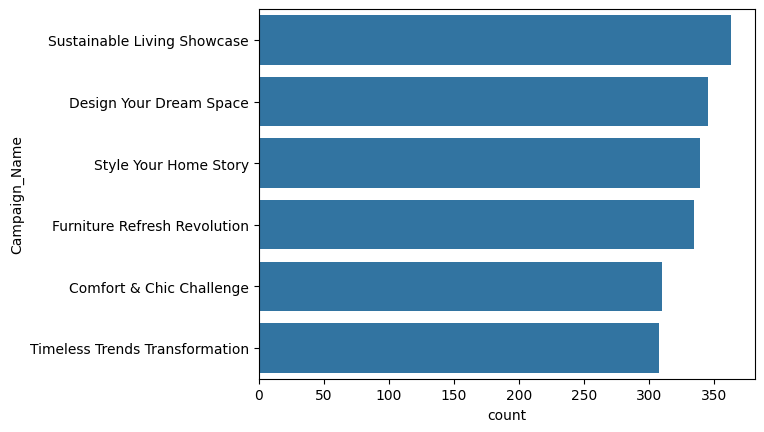

In [ ]:
sns.countplot(df['Campaign_Name'] ,order=order)
plt.show()

In [ ]:
df['Marketing_Channel'].value_counts()

,count
Marketing_Channel,
Paid Ads,525
Social Media,504
Email,488
Influencer Marketing,483


In [ ]:
order = df['Marketing_Channel'].value_counts().index

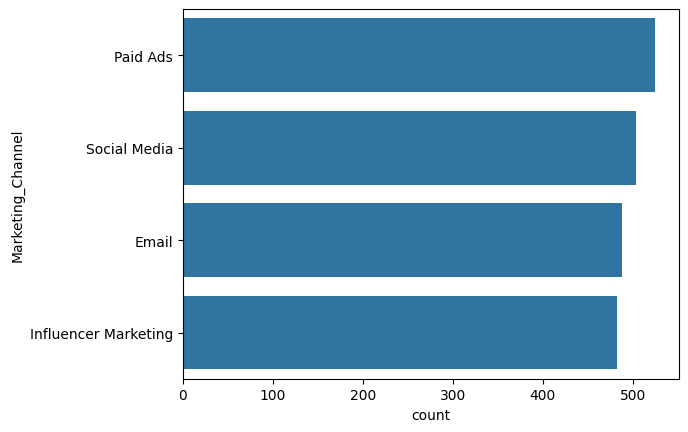

In [ ]:
sns.countplot(df['Marketing_Channel'] , order=order)
plt.show()

In [ ]:
df['Age_Group'].value_counts()

,count
Age_Group,
55+,420
25-34,413
18-24,408
35-44,384
45-54,375


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,1026
Female,974


In [ ]:
df['Location'].value_counts()

,count
Location,
Bucharest,440
Brașov,402
Timișoara,394
Iași,393
Cluj-Napoca,371


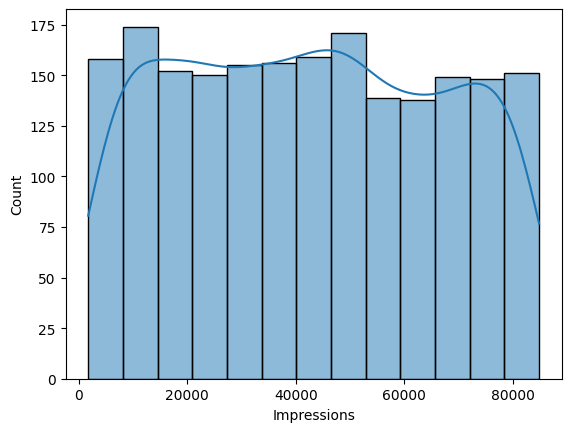

In [ ]:
#distribution of impressions across marketing campaigns.
sns.histplot(df['Impressions'] , kde=True)
plt.show()

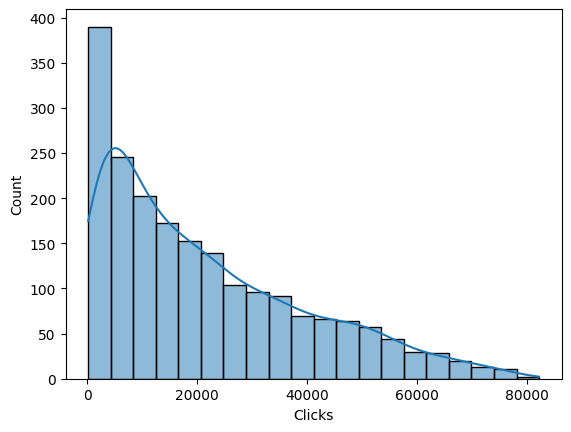

In [ ]:
sns.histplot(df['Clicks'] , kde=True)
plt.show()

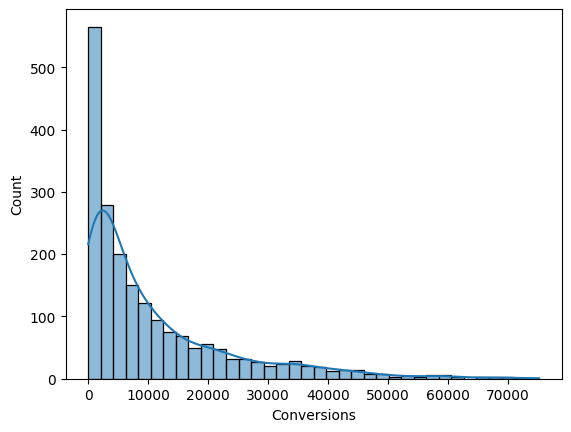

In [ ]:
sns.histplot(df['Conversions'] , kde=True)
plt.show()

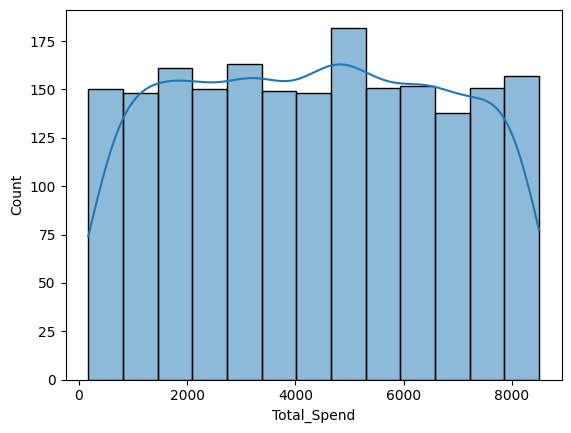

In [ ]:
sns.histplot(df['Total_Spend'] , kde=True)
plt.show()

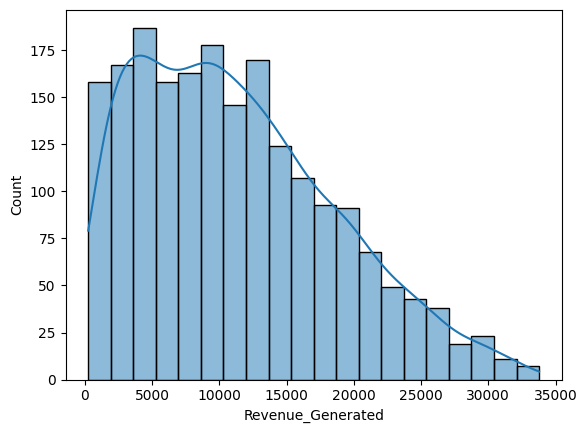

In [ ]:
sns.histplot(df['Revenue_Generated'] , kde=True)
plt.show()

# Analysis

In [ ]:
# Calculate duration in days
df['Duration'] = (df['End_Date'] - df['Start_Date']).dt.days

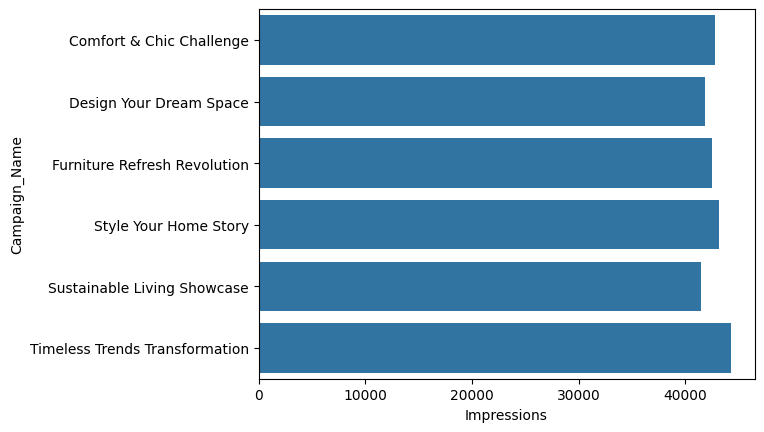

In [ ]:
#show impressions acrosss each Campaign
sns.barplot(data=(df.groupby('Campaign_Name')['Impressions'].mean().reset_index()) , x='Impressions', y='Campaign_Name' )
plt.show()

In [ ]:
df.groupby('Campaign_Name')['Clicks'].mean()

,Clicks
Campaign_Name,
Comfort & Chic Challenge,21139.061290
Design Your Dream Space,21129.950435
Furniture Refresh Revolution,20421.110448
Style Your Home Story,22047.545723
Sustainable Living Showcase,21645.580165
Timeless Trends Transformation,22024.167857


In [ ]:
df.groupby('Campaign_Name')['Conversions'].mean()

,Conversions
Campaign_Name,
Comfort & Chic Challenge,11397.677419
Design Your Dream Space,10786.647826
Furniture Refresh Revolution,10034.856418
Style Your Home Story,10744.305900
Sustainable Living Showcase,10830.517355
Timeless Trends Transformation,10816.503896


In [ ]:
df.groupby('Campaign_Name')['Total_Spend'].mean()

,Total_Spend
Campaign_Name,
Comfort & Chic Challenge,4273.966545
Design Your Dream Space,4562.332180
Furniture Refresh Revolution,4090.628654
Style Your Home Story,4392.449619
Sustainable Living Showcase,4254.311771
Timeless Trends Transformation,4429.781568


In [ ]:
(df.groupby('Campaign_Name')['Revenue_Generated'].mean())

,Revenue_Generated
Campaign_Name,
Comfort & Chic Challenge,11562.987613
Design Your Dream Space,11756.768200
Furniture Refresh Revolution,10321.280284
Style Your Home Story,11295.326599
Sustainable Living Showcase,11469.608658
Timeless Trends Transformation,11224.915539


In [ ]:
df['Impressions'].corr(df['Revenue_Generated'])

0.002791034900938006

In [ ]:
# Calculating Campaign metrics
df['CTR (%)'] = (df['Clicks'] / df['Impressions']) * 100
df['Conversion Rate (%)'] = (df['Conversions'] / df['Clicks']) * 100
df['Cost per Click (CPC)'] = df['Total_Spend'] / df['Clicks']
df['Cost per Acquisition (CPA)'] = df['Total_Spend'] / df['Conversions']
df['Return on Advertising Spend (ROAS)'] = df['Revenue_Generated'] / df['Total_Spend']

In [ ]:
df.head()

,Campaign_ID,Campaign_Name,Marketing_Channel,Start_Date,End_Date,Impressions,Clicks,Conversions,Total_Spend,Revenue_Generated,Location,Age_Group,Gender,Duration,CTR (%),Conversion Rate (%),Cost per Click (CPC),Cost per Acquisition (CPA),Return on Advertising Spend (ROAS)
0,CMP1,Timeless Trends Transformation,Paid Ads,2022-11-09,2024-04-25,23448.1,3488.4,2289.9,2461.447,9434.541,Timișoara,35-44,Male,533,14.877112,65.643275,0.705609,1.074915,3.832925
1,CMP2,Design Your Dream Space,Paid Ads,2022-12-27,2024-05-12,34902.7,3513.9,3362.6,7558.761,18383.409,Timișoara,35-44,Male,502,10.067702,95.694243,2.151103,2.247892,2.432066
2,CMP3,Style Your Home Story,Email,2022-11-03,2024-04-07,13545.6,7962.8,7792.8,3568.351,5198.192,Bucharest,55+,Female,521,58.785141,97.865073,0.448128,0.457904,1.456749
3,CMP4,Comfort & Chic Challenge,Email,2022-11-29,2024-04-26,42709.1,22472.3,3221.5,4703.662,17582.828,Bucharest,25-34,Male,514,52.617124,14.335426,0.209309,1.460084,3.738115
4,CMP5,Timeless Trends Transformation,Email,2023-06-12,2024-11-04,4282.3,2981.8,2716.6,2477.512,3759.363,Bucharest,55+,Male,511,69.630806,91.106043,0.830878,0.911990,1.517394


<Axes: xlabel='Conversion Rate (%)', ylabel='Campaign_Name'>

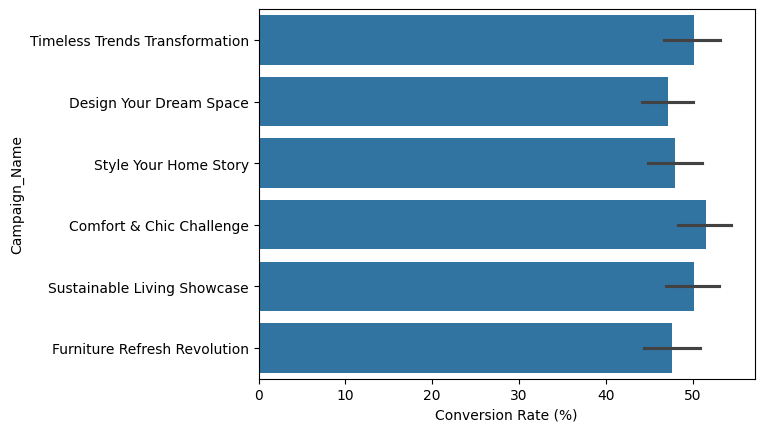

In [ ]:
#Conversion Rate across each Campaign
sns.barplot(y=df['Campaign_Name'] ,x=df['Conversion Rate (%)'])

<Axes: xlabel='Cost per Click (CPC)', ylabel='Campaign_Name'>

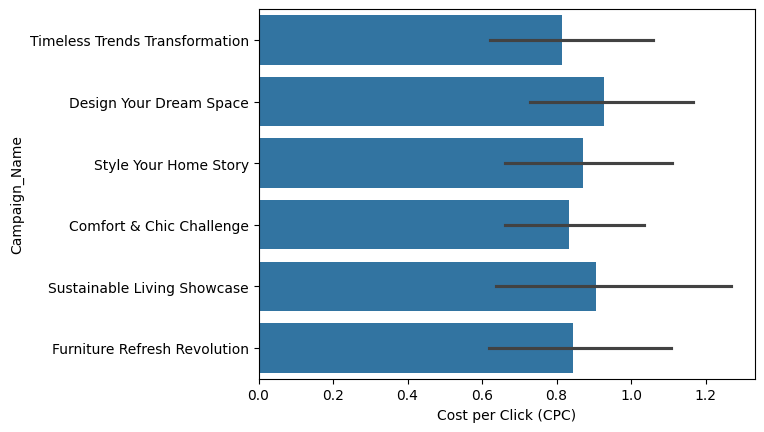

In [ ]:
#Cost per Click (CPC)  across each Campaign
sns.barplot(y=df['Campaign_Name'] ,x=df['Cost per Click (CPC)'])

<Axes: xlabel='Cost per Acquisition (CPA)', ylabel='Campaign_Name'>

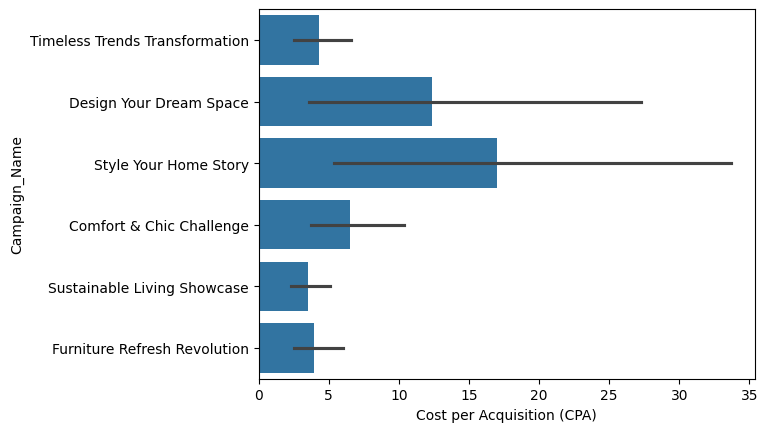

In [ ]:
#Cost per Acquisition (CPA) across each Campaign
sns.barplot(y=df['Campaign_Name'] ,x=df['Cost per Acquisition (CPA)'])

<Axes: xlabel='Return on Advertising Spend (ROAS)', ylabel='Campaign_Name'>

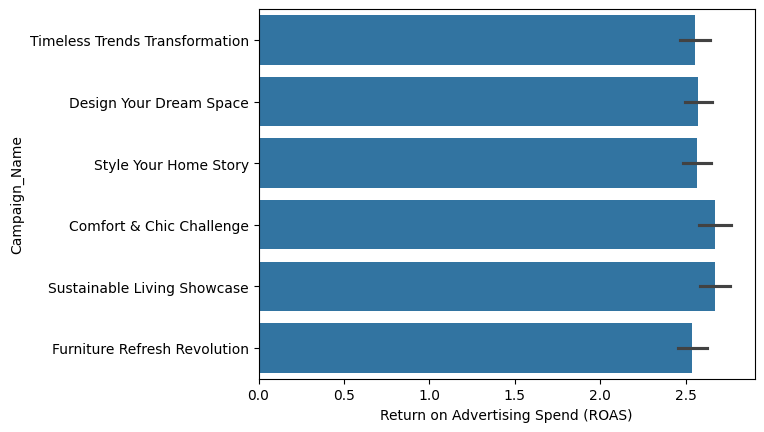

In [ ]:
#Return on Advertising Spend (ROAS) across each Campaign
sns.barplot(y=df['Campaign_Name'] ,x=df['Return on Advertising Spend (ROAS)'])

In [ ]:
df['Revenue_Generated'].corr(df['Conversion Rate (%)'])

0.02266485331638097

<Axes: xlabel='Return on Advertising Spend (ROAS)', ylabel='Marketing_Channel'>

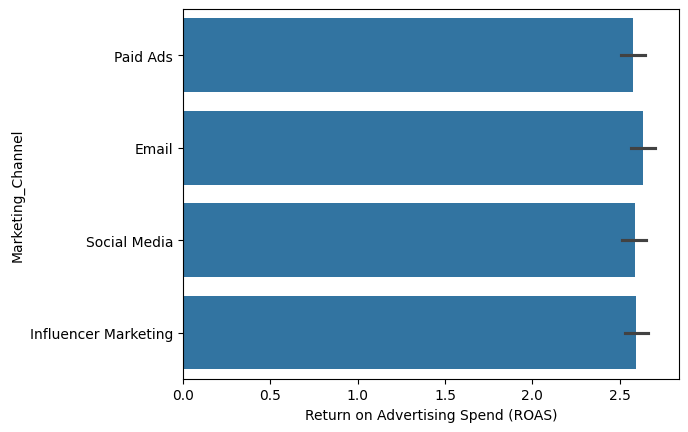

In [ ]:
#return Return on Advertising Spend (ROAS) for each channel
sns.barplot(y=df['Marketing_Channel'] ,x=df['Return on Advertising Spend (ROAS)'])

Best channel in ROS is Paid ads


<Axes: xlabel='Conversion Rate (%)', ylabel='Marketing_Channel'>

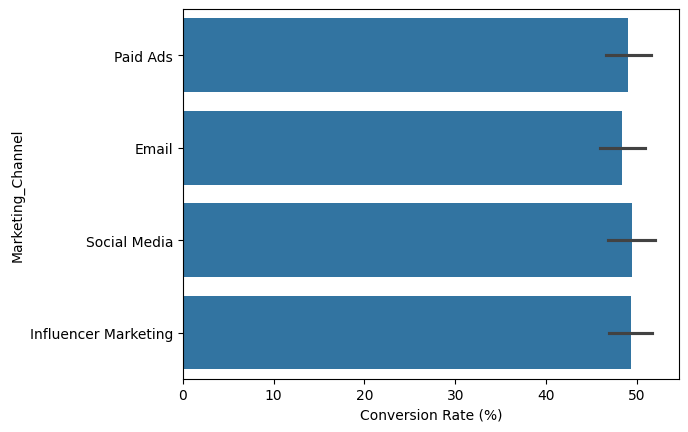

In [ ]:
#Return Conversion Rate (%) for each channel
sns.barplot(y=df['Marketing_Channel'] ,x=df['Conversion Rate (%)'])

Best channel in Conversion Rate is Social media



In [ ]:
#channels with high costs and low ROAS for budget review and adjustments.
low_roas_threshold = 1.3
df_low = (df[df['Return on Advertising Spend (ROAS)'] <low_roas_threshold])
df_low.sort_values(by='Total_Spend', ascending=False).head(15)

,Campaign_ID,Campaign_Name,Marketing_Channel,Start_Date,End_Date,Impressions,Clicks,Conversions,Total_Spend,Revenue_Generated,Location,Age_Group,Gender,Duration,CTR (%),Conversion Rate (%),Cost per Click (CPC),Cost per Acquisition (CPA),Return on Advertising Spend (ROAS)
1562,CMP1563,Furniture Refresh Revolution,Social Media,2023-05-30,2024-10-19,8124.3,4394.5,251.6,8465.439,10686.081,Brașov,45-54,Male,508,54.090814,5.725338,1.926371,33.646419,1.262319
1395,CMP1396,Sustainable Living Showcase,Paid Ads,2022-12-07,2024-05-18,84484.9,24782.6,5953.4,8338.347,10254.638,Cluj-Napoca,55+,Male,528,29.333763,24.022500,0.336460,1.400603,1.229817
1091,CMP1092,Style Your Home Story,Paid Ads,2022-12-17,2024-05-19,23453.2,19721.7,3039.6,8315.890,10242.721,Iași,25-34,Male,519,84.089591,15.412464,0.421662,2.735850,1.231705
1567,CMP1568,Furniture Refresh Revolution,Paid Ads,2023-01-24,2024-06-13,30125.7,26548.9,3250.4,8200.341,10210.574,Brașov,55+,Male,506,88.127081,12.243068,0.308877,2.522871,1.245140
509,CMP510,Furniture Refresh Revolution,Paid Ads,2023-06-07,2024-10-27,54602.3,17715.7,1307.3,8078.145,10200.153,Cluj-Napoca,45-54,Male,508,32.444970,7.379330,0.455988,6.179259,1.262685
480,CMP481,Style Your Home Story,Influencer Marketing,2022-10-17,2024-03-06,69813.9,39936.4,20313.3,7928.392,9625.264,Brașov,18-24,Male,506,57.204081,50.864124,0.198525,0.390305,1.214025
1119,CMP1120,Furniture Refresh Revolution,Email,2022-11-21,2024-04-10,1989.0,765.0,331.5,7876.559,9536.609,Timișoara,45-54,Female,506,38.461538,43.333333,10.296156,23.760359,1.210758
106,CMP107,Sustainable Living Showcase,Paid Ads,2022-12-08,2024-05-19,7848.9,433.5,175.1,7805.176,9812.094,Iași,25-34,Female,528,5.523067,40.392157,18.005020,44.575534,1.257127
1967,CMP1968,Style Your Home Story,Influencer Marketing,2023-03-26,2024-08-25,42265.4,19682.6,11391.7,7495.317,9463.169,Timișoara,45-54,Female,518,46.569061,57.877008,0.380809,0.657963,1.262544
1130,CMP1131,Furniture Refresh Revolution,Social Media,2022-09-04,2024-01-20,75422.2,38873.9,15755.6,7415.791,9031.505,Brașov,25-34,Male,503,51.541721,40.530021,0.190765,0.470677,1.217875


**Several Paid Ads campaigns have high total spend but generate relatively low ROAS**

## campaign performance by demographics

<Axes: xlabel='count', ylabel='Campaign_Name'>

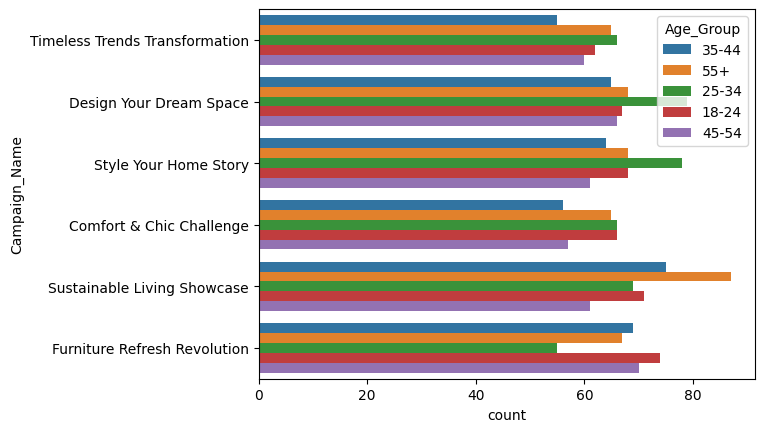

In [ ]:
sns.countplot(data = df , y='Campaign_Name', hue = 'Age_Group')

-Design Your Dream Space, Style Your Home Story and Timeless Trends Transformation compaigns have a notably high count in 25-34, suggesting this group is more  engaged in the most campaigns.
Some campaigns, such as "Sustainable Living Showcase," have a notably high count in the 55+ age group, indicating that this campaign may appeal more to older participants.
There is generally a lower representation of the 18-24 age group across the campaigns.

<Axes: xlabel='count', ylabel='Campaign_Name'>

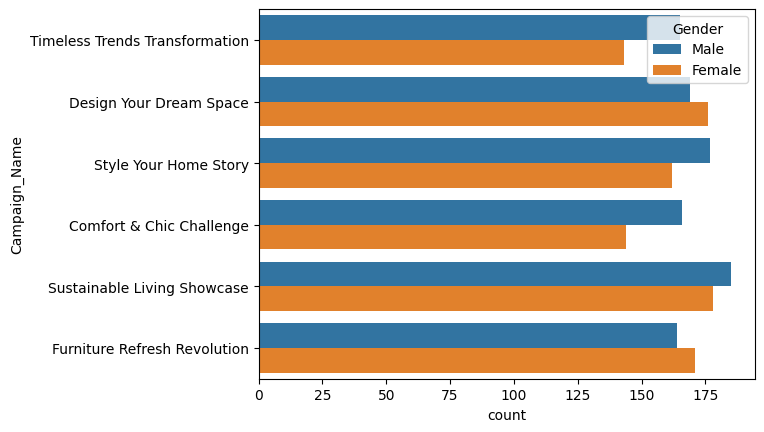

In [ ]:
sns.countplot(data = df , y='Campaign_Name', hue = 'Gender')

Male love most Your Home Story, Timeless Trends Transformation, Comfort & Chi Challenge and Sustanable Living Showcase
Female love the other

<Axes: xlabel='count', ylabel='Campaign_Name'>

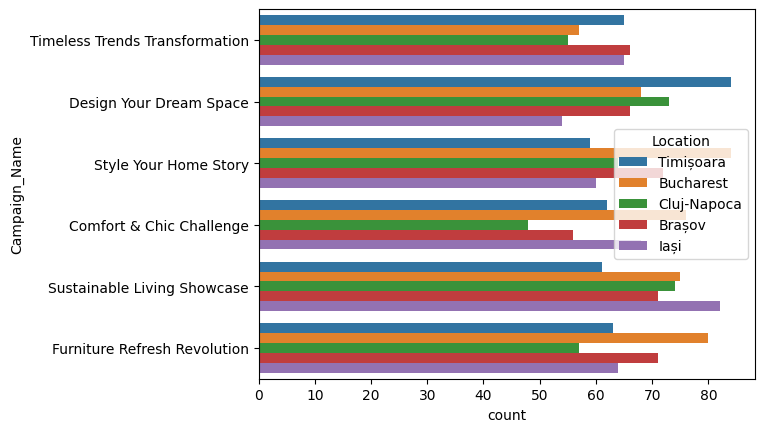

In [ ]:
sns.countplot(data = df , y='Campaign_Name', hue = 'Location')

Design Your Dream Space and Timeless Trends Transformation compaigns have a notably high count in Timisoara
 Comfort & Chi Challenge and Sustanable Living Showcase have a notably high count in lasi
 Style your home has high count in Burcharest

## campaign performance by channel

<Axes: xlabel='count', ylabel='Marketing_Channel'>

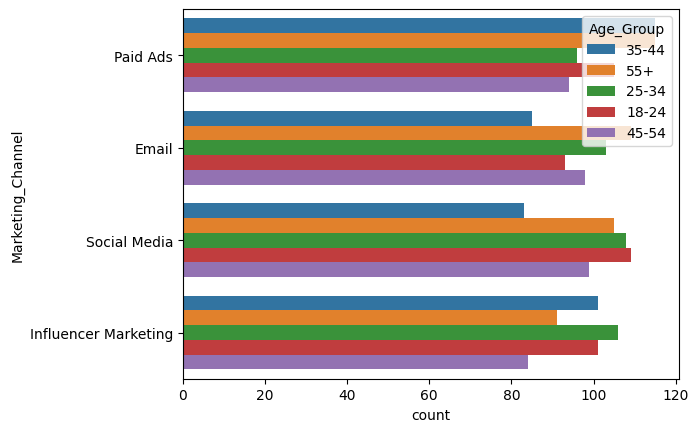

In [ ]:
sns.countplot(data = df , y='Marketing_Channel', hue = 'Age_Group')

55+ group prefers Email, 18-24 prefers Social media, 35-44 prefers paid Ads and 25-34 prefers Influncer Marketing

<Axes: xlabel='count', ylabel='Marketing_Channel'>

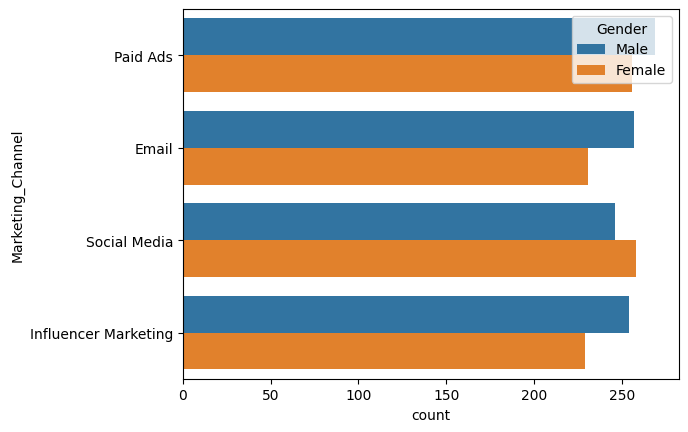

In [ ]:
sns.countplot(data = df , y='Marketing_Channel', hue = 'Gender')

female in most in social media, male in the other

<Axes: xlabel='count', ylabel='Marketing_Channel'>

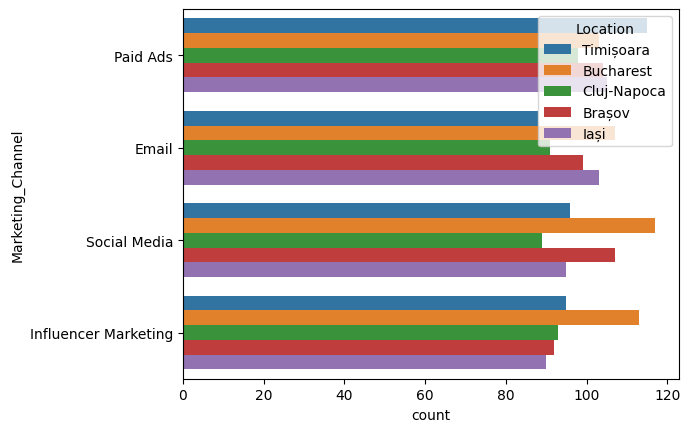

In [ ]:
sns.countplot(data = df , y='Marketing_Channel', hue = 'Location')

## ROS over Dates

In [ ]:
# Expand each campaign's date range by week or month
campaigns_resampled = []

for _, row in df.iterrows():
    date_range = pd.date_range(row['Start_Date'], row['End_Date'], freq='W')  # Change 'W' to 'M' for monthly
    temp_df = pd.DataFrame({
        'Campaign_ID': row['Campaign_ID'],
        'Campaign_Name': row['Campaign_Name'],
        'Marketing_Channel': row['Marketing_Channel'],
        'Location': row['Location'],
        'Age_Group': row['Age_Group'],
        'Gender': row['Gender'],
        'Date': date_range
    })
    temp_df['Impressions'] = row['Impressions'] / len(date_range)
    temp_df['Clicks'] = row['Clicks'] / len(date_range)
    temp_df['Conversions'] = row['Conversions'] / len(date_range)
    temp_df['Total_Spend'] = row['Total_Spend'] / len(date_range)
    temp_df['Revenue_Generated'] = row['Revenue_Generated'] / len(date_range)
    campaigns_resampled.append(temp_df)

# Concatenate all campaigns
df_resampled = pd.concat(campaigns_resampled)

# Calculate performance metrics
df_resampled['CTR'] = (df_resampled['Clicks'] / df_resampled['Impressions']) * 100
df_resampled['Conversion_Rate'] = (df_resampled['Conversions'] / df_resampled['Clicks']) * 100
df_resampled['ROAS'] = df_resampled['Revenue_Generated'] / df_resampled['Total_Spend']

# Aggregate by time period (weekly/monthly) to see trends
weekly_trends = df_resampled.groupby('Date').sum()[['Impressions', 'Clicks', 'Conversions', 'Total_Spend', 'Revenue_Generated']]
weekly_trends['CTR'] = (weekly_trends['Clicks'] / weekly_trends['Impressions']) * 100
weekly_trends['Conversion_Rate'] = (weekly_trends['Conversions'] / weekly_trends['Clicks']) * 100
weekly_trends['ROAS'] = weekly_trends['Revenue_Generated'] / weekly_trends['Total_Spend']

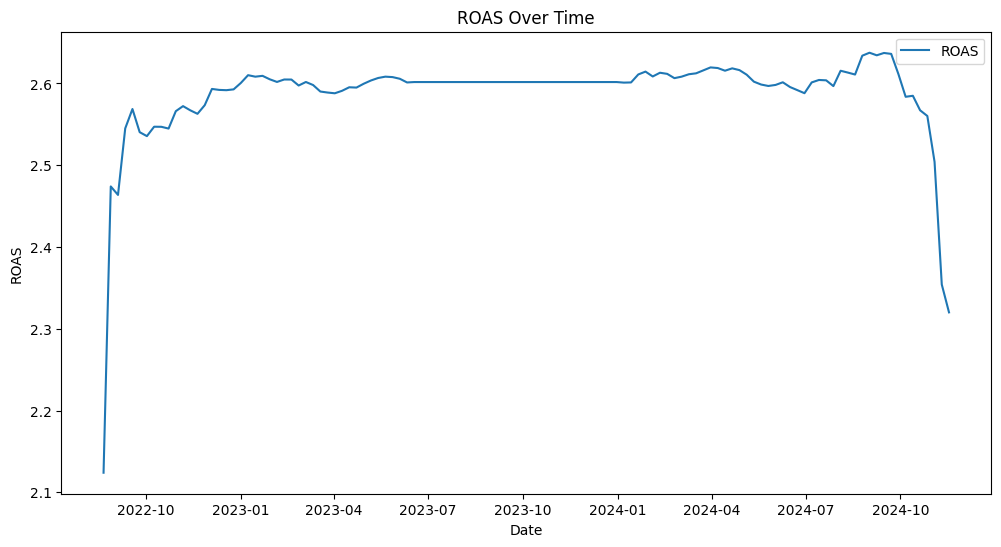

In [ ]:
# Optional: Plot the trends to visualize seasonal variations
import matplotlib.pyplot as plt

# Plot ROAS trend
plt.figure(figsize=(12, 6))
plt.plot(weekly_trends.index, weekly_trends['ROAS'], label='ROAS')
plt.xlabel('Date')
plt.ylabel('ROAS')
plt.title('ROAS Over Time')
plt.legend()
plt.show()

In [ ]:
df.head()

,Campaign_ID,Campaign_Name,Marketing_Channel,Start_Date,End_Date,Impressions,Clicks,Conversions,Total_Spend,Revenue_Generated,Location,Age_Group,Gender,Duration,CTR (%),Conversion Rate (%),Cost per Click (CPC),Cost per Acquisition (CPA),Return on Advertising Spend (ROAS)
0,CMP1,Timeless Trends Transformation,Paid Ads,2022-11-09,2024-04-25,23448.1,3488.4,2289.9,2461.447,9434.541,Timișoara,35-44,Male,533,14.877112,65.643275,0.705609,1.074915,3.832925
1,CMP2,Design Your Dream Space,Paid Ads,2022-12-27,2024-05-12,34902.7,3513.9,3362.6,7558.761,18383.409,Timișoara,35-44,Male,502,10.067702,95.694243,2.151103,2.247892,2.432066
2,CMP3,Style Your Home Story,Email,2022-11-03,2024-04-07,13545.6,7962.8,7792.8,3568.351,5198.192,Bucharest,55+,Female,521,58.785141,97.865073,0.448128,0.457904,1.456749
3,CMP4,Comfort & Chic Challenge,Email,2022-11-29,2024-04-26,42709.1,22472.3,3221.5,4703.662,17582.828,Bucharest,25-34,Male,514,52.617124,14.335426,0.209309,1.460084,3.738115
4,CMP5,Timeless Trends Transformation,Email,2023-06-12,2024-11-04,4282.3,2981.8,2716.6,2477.512,3759.363,Bucharest,55+,Male,511,69.630806,91.106043,0.830878,0.911990,1.517394


In [ ]:
#save clean data in excel file
df.to_csv('clean_data.xlsx', index=False)

## predict ROS

In [ ]:
#Encode categorical columns
df = pd.get_dummies(df, columns=['Marketing_Channel', 'Location', 'Age_Group', 'Gender'], drop_first=True)


In [ ]:
# Define the features (X) and target (y)
X = df.drop(['Return on Advertising Spend (ROAS)', 'Campaign_ID', 'Campaign_Name', 'Start_Date', 'End_Date'], axis=1)
y = df['Return on Advertising Spend (ROAS)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [ ]:
model.score(X_train , y_train)

0.9967574773188813

In [ ]:
model.score(X_test , y_test)

0.9775092889493207

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.014388946517361351


In [ ]:
# Feature Importance
importances = model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df.head())

                Feature  Importance
4     Revenue_Generated    0.576708
3           Total_Spend    0.398094
0           Impressions    0.003225
7   Conversion Rate (%)    0.003201
8  Cost per Click (CPC)    0.003088
